# Model With vs Without Regularization 
## Using L2 Regularization


Load data

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

Define models

In [10]:
# Model without regularization
def create_model_without_regularization():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Model with L2 regularization and dropout
def create_model_with_regularization():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

Train models

In [11]:
# Compile and train the model without regularization
model_without_reg = create_model_without_regularization()
model_without_reg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_without_reg = model_without_reg.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Compile and train the model with regularization
model_with_reg = create_model_with_regularization()
model_with_reg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_with_reg = model_with_reg.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - accuracy: 0.8773 - loss: 0.4309 - val_accuracy: 0.9571 - val_loss: 0.1410
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9649 - loss: 0.1188 - val_accuracy: 0.9676 - val_loss: 0.1009
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.9776 - loss: 0.0753 - val_accuracy: 0.9734 - val_loss: 0.0881
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 957us/step - accuracy: 0.9837 - loss: 0.0558 - val_accuracy: 0.9733 - val_loss: 0.0897
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 919us/step - accuracy: 0.9863 - loss: 0.0451 - val_accuracy: 0.9731 - val_loss: 0.0841
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.9903 - loss: 0.0332 - val_accuracy: 0.9763 - val_loss: 0.0786
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.9915 - loss: 0.0263 - val_accuracy: 0.9732 - val_loss: 0.0897
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - accuracy: 0.9934 - l

Compare results

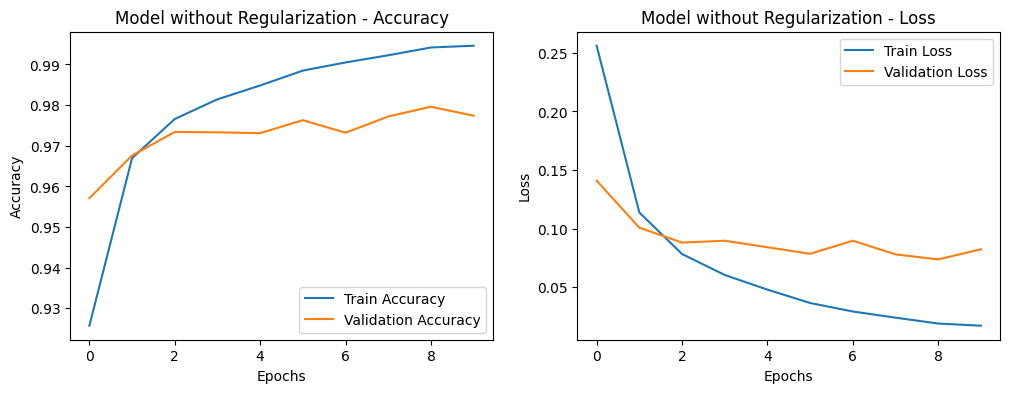

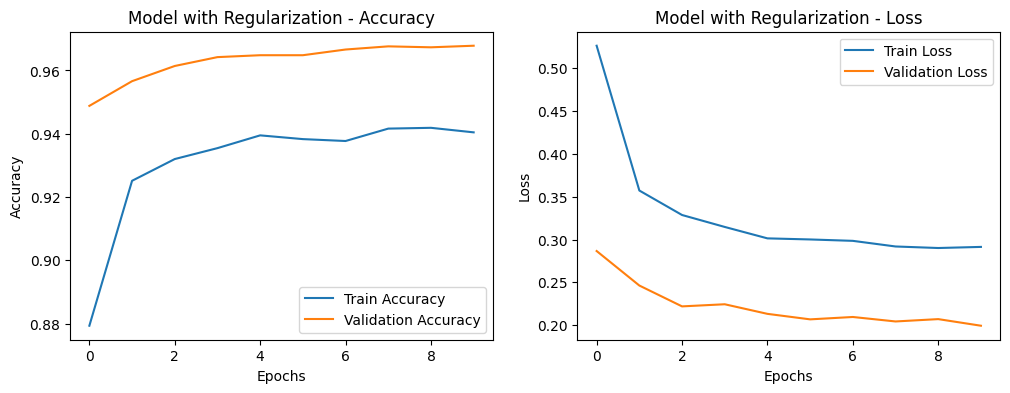

In [12]:
# Plot accuracy and loss curves
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Plot results for both models
plot_history(history_without_reg, 'Model without Regularization')
plot_history(history_with_reg, 'Model with Regularization')

As you can see above, the model without regularization fits the training data too well, which is usually not good for when the model enncounters new unseen data.